# Global Demographics and Linguistic Diversity: An Exploratory Data Analysis

## Goal:
The goal of this project is to explore global population distribution, urbanization, and linguistic diversity using a structured dataset of countries, cities, and languages. Through SQL-style joins and Python-based exploratory data analysis (EDA), the project aims to uncover insights about:
1) How populations are distributed across continents, countries, and cities.
2) The relationship between economic indicators (GNP, per capita wealth) and population size.
3) Urbanization trends and the role of mega-cities in national demographics.
4) The spread and dominance of official vs. non-official languages worldwide.
The project demonstrates skills in data cleaning, relational joins, visualization, and storytelling with data—essential for a career in data analysis or data science.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [119]:

# Load datasets
city = pd.read_csv("demographics/city.csv")
country = pd.read_csv("demographics/country.csv")
language = pd.read_csv("demographics/countrylanguage.csv")


In [120]:
print("City:", city.shape)
print("Country:", country.shape)
print("Language:", language.shape)

city.head(), country.head(), language.head()

City: (4079, 5)
Country: (239, 15)
Language: (984, 4)


(   ID            Name CountryCode       District  Population
 0   1           Kabul         AFG          Kabol     1780000
 1   2        Qandahar         AFG       Qandahar      237500
 2   3           Herat         AFG          Herat      186800
 3   4  Mazar-e-Sharif         AFG          Balkh      127800
 4   5       Amsterdam         NLD  Noord-Holland      731200,
   Code         Name      Continent                     Region  SurfaceArea  \
 0  ABW        Aruba  North America                  Caribbean        193.0   
 1  AFG  Afghanistan           Asia  Southern and Central Asia     652090.0   
 2  AGO       Angola         Africa             Central Africa    1246700.0   
 3  AIA     Anguilla  North America                  Caribbean         96.0   
 4  ALB      Albania         Europe            Southern Europe      28748.0   
 
    IndepYear  Population  LifeExpectancy     GNP  GNPOld  \
 0        NaN      103000            78.4   828.0   793.0   
 1     1919.0    22720000    

In [14]:
city.info()
country.info()
language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           4079 non-null   int64 
 1   Name         4079 non-null   object
 2   CountryCode  4079 non-null   object
 3   District     4075 non-null   object
 4   Population   4079 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 159.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64


In [102]:
#Missing Values
print("Missing values in city:\n", city.isnull().sum())
print("Missing values in country:\n", country.isnull().sum())
print("Missing values in language:\n", language.isnull().sum()) 


Missing values in city:
 ID             0
Name           0
CountryCode    0
District       0
Population     0
dtype: int64
Missing values in country:
 Code                  0
Name                  0
Continent             0
Region                0
SurfaceArea           0
IndepYear            47
Population            0
LifeExpectancy        5
GNP                   0
GNPOld               61
LocalName             0
GovernmentForm        0
HeadOfState           3
Capital               7
Code2                 1
PopulationDensity     0
dtype: int64
Missing values in language:
 CountryCode    0
Language       0
IsOfficial     0
Percentage     0
dtype: int64


In [103]:
#Unique Values
print("Unique values in city:\n", city.nunique())
print("Unique values in country:\n", country.nunique())
print("Unique values in language:\n", language.nunique())

Unique values in city:
 ID             4079
Name           4001
CountryCode     232
District       1367
Population     3897
dtype: int64
Unique values in country:
 Code                 239
Name                 239
Continent              7
Region                25
SurfaceArea          238
IndepYear             88
Population           226
LifeExpectancy       161
GNP                  214
GNPOld               178
LocalName            239
GovernmentForm        35
HeadOfState          178
Capital              232
Code2                238
PopulationDensity    232
dtype: int64
Unique values in language:
 CountryCode    233
Language       457
IsOfficial       2
Percentage     357
dtype: int64


In [114]:
# Treat missing values

# City: District - fill with "Unknown"
city["District"].fillna("Unknown", inplace=True)

# Population: fill with median population of cities in that country
country["LifeExpectancy"] = country.groupby("Continent")["LifeExpectancy"].transform(
    lambda x: x.fillna(x.median()))

# GNPOld: drop column due to high missingness (about 50%)
country.drop(columns=["GNPOld"], inplace=True, errors="ignore")

# HeadOfState: fill with "Unknown"
country["HeadOfState"] = country["HeadOfState"].fillna("Unknown")

# Capital: fill with "Unknown" (better: manually enrich if possible)
country["Capital"] = country["Capital"].astype("object").fillna("Unknown")

# Code2: fill with "NA"
country["Code2"] = country["Code2"].fillna("NA")

In [105]:
# Joining DataFrames
city_country = city.merge(country, left_on="CountryCode", right_on="Code", how="left")
country_lang = language.merge(country, left_on="CountryCode", right_on="Code", how="left")
city_country_lang = city_country.merge(language, left_on="CountryCode", right_on="CountryCode", how="left")

city_country.head()


,ID,Name_x,CountryCode,District,Population_x,Code,Name_y,Continent,Region,SurfaceArea,...,Population_y,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,PopulationDensity
0,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,34.841816
1,2,Qandahar,AFG,Qandahar,237500,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,34.841816
2,3,Herat,AFG,Herat,186800,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,34.841816
3,4,Mazar-e-Sharif,AFG,Balkh,127800,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,34.841816
4,5,Amsterdam,NLD,Noord-Holland,731200,NLD,Netherlands,Europe,Western Europe,41526.0,...,15864000,78.3,371362.0,360478.0,Nederland,Constitutional Monarchy,Beatrix,5.0,NL,382.025719


In [106]:

# Plotting settings
sns.set_theme(style="whitegrid", palette="crest")     


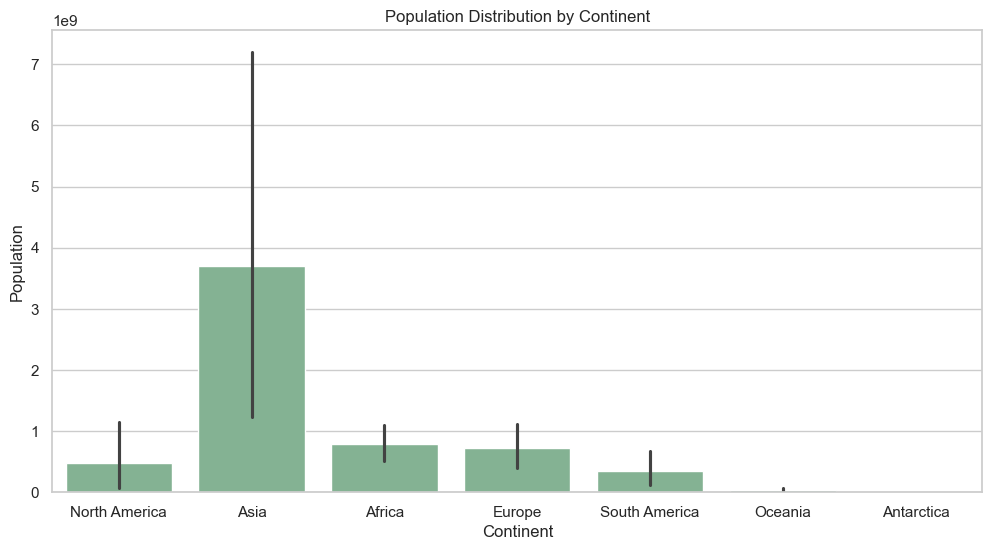

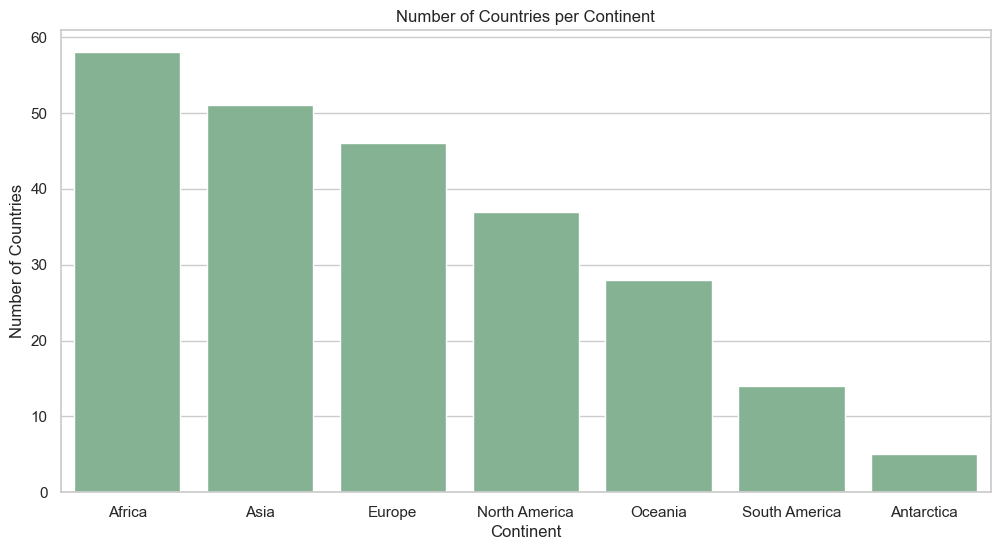

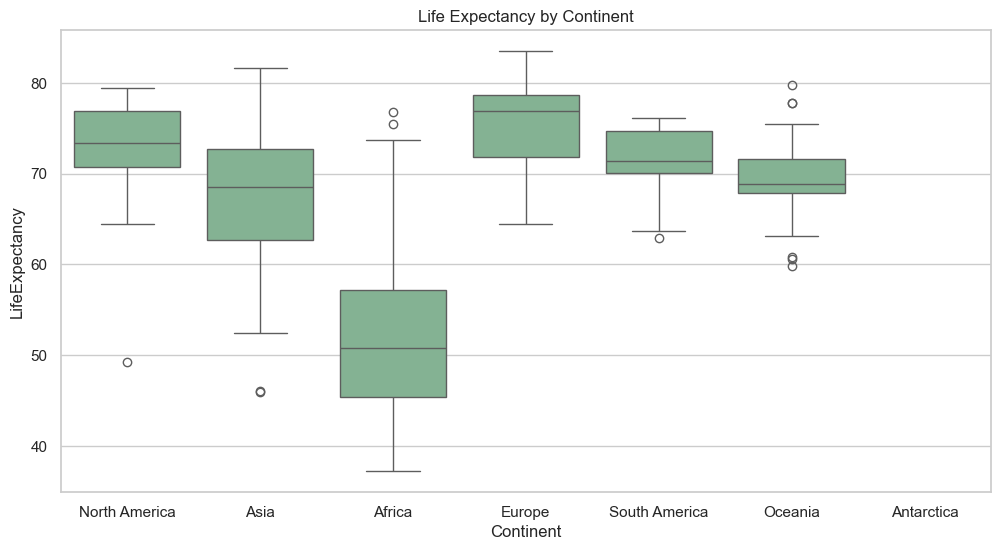

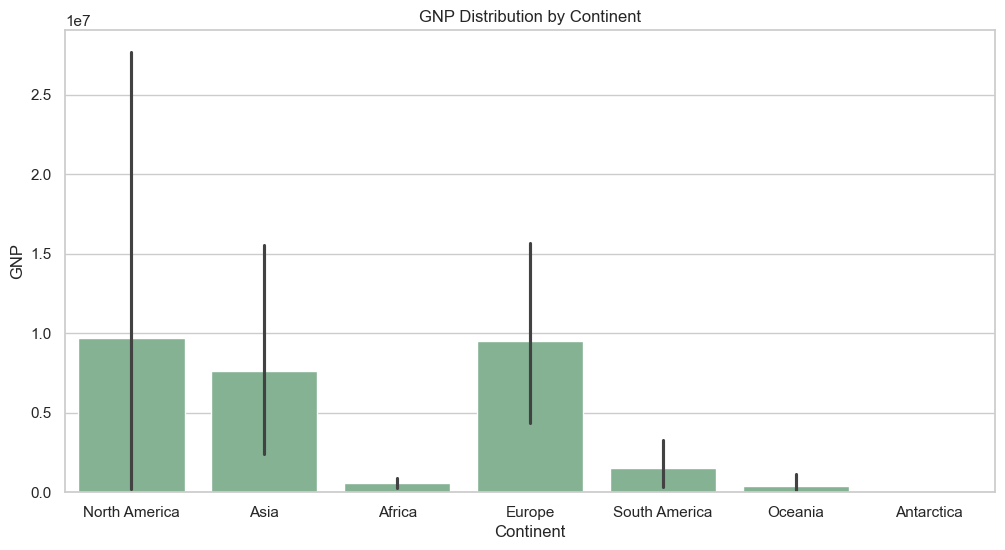

In [107]:
# 1. Population distribution by continent
plt.figure(figsize=(12,6))
sns.barplot(x="Continent", y="Population", data=country, estimator=sum)
plt.title("Population Distribution by Continent")
plt.show()
# Insight: Asia dominates world population, followed by Africa and Europe. Oceania has the smallest population share.


# 2. Number of countries per continent
continent_counts = country['Continent'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title("Number of Countries per Continent")
plt.ylabel("Number of Countries")
plt.show()
# Insight: Africa has the highest number of countries, reflecting its political diversity. Oceania and South America have relatively fewer countries.


# 3. Life expectancy by continent
plt.figure(figsize=(12,6))
sns.boxplot(x="Continent", y="LifeExpectancy", data=country)
plt.title("Life Expectancy by Continent")
plt.show()
# Insight: Europe and Oceania show higher median life expectancies, while Africa lags behind with greater variation.


# 4. GNP distribution by continent
plt.figure(figsize=(12,6))
sns.barplot(x="Continent", y="GNP", data=country, estimator=sum)
plt.title("GNP Distribution by Continent")
plt.show()
# Insight: North America and Asia dominate global economic output. Africa contributes the least in GNP despite its population size.


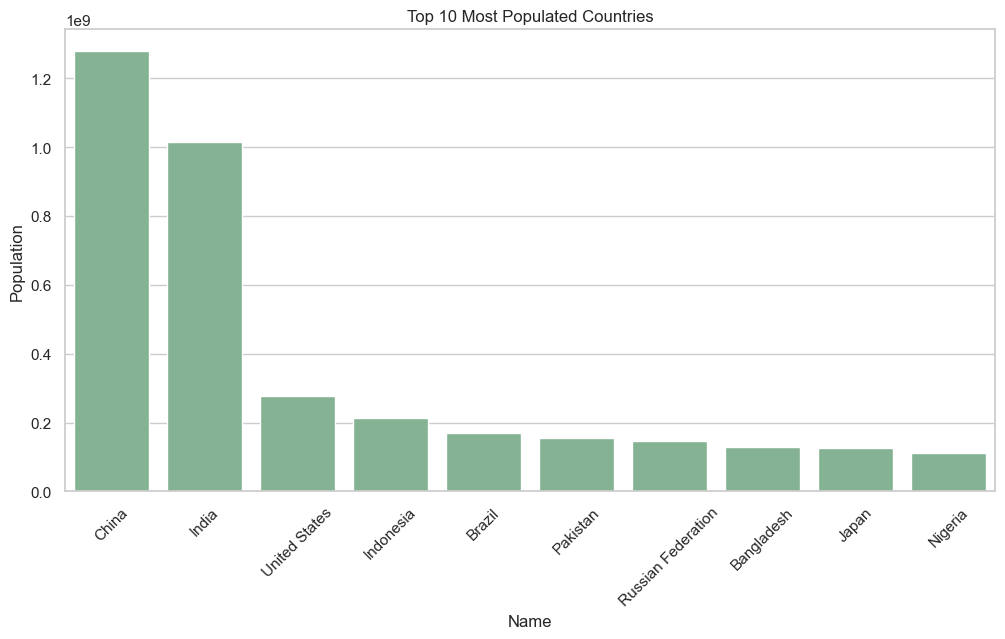

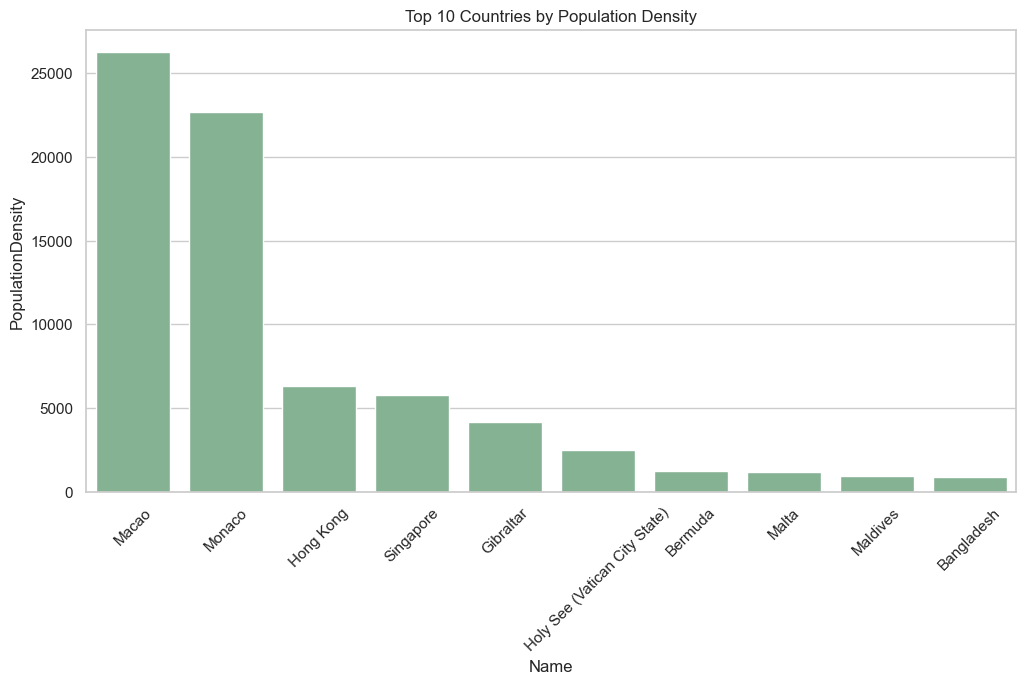

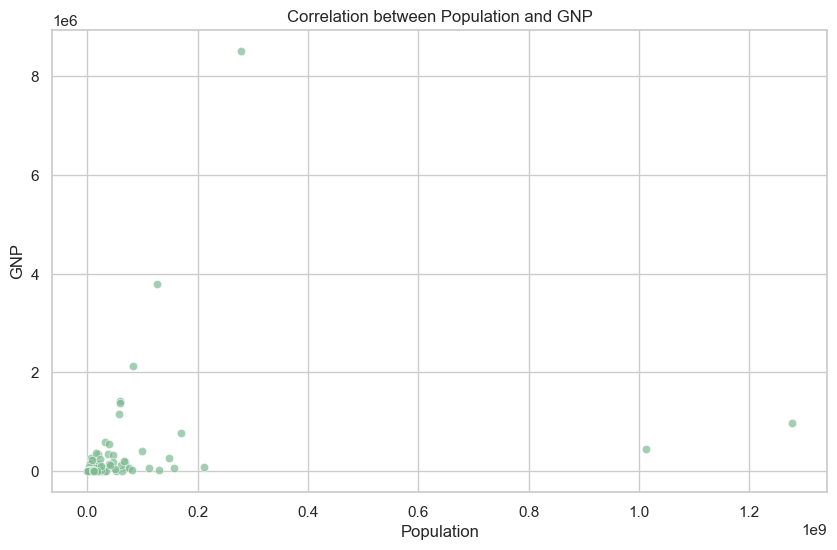

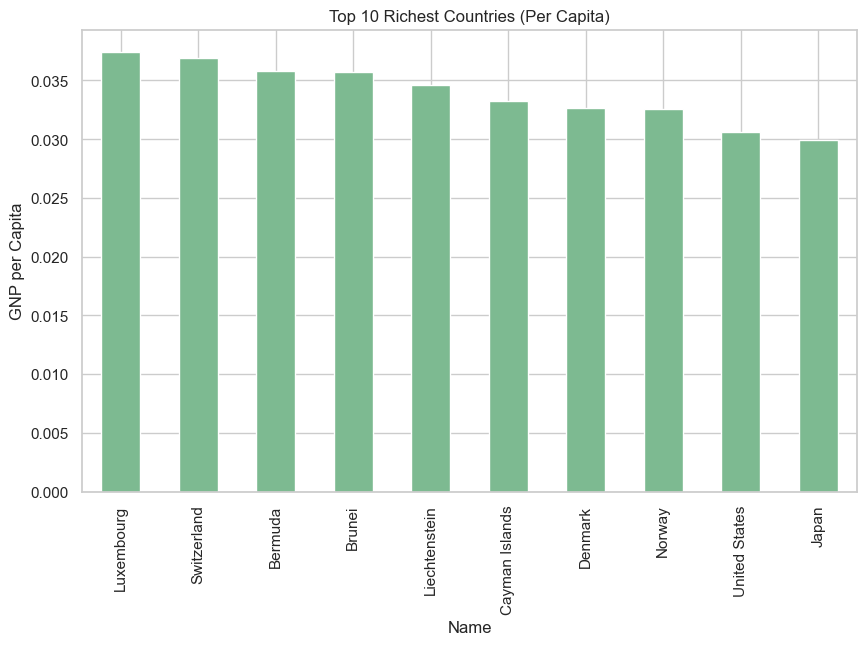

In [ ]:
# ----------------------------
# B. Country-Level Insights
# ----------------------------

# 5. Top 10 most populated countries
top_countries = country.sort_values("Population", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x="Name", y="Population", data=top_countries)
plt.title("Top 10 Most Populated Countries")
plt.xticks(rotation=45)
plt.show()
# Insight: China and India account for a massive share of the global population, followed by the US and Indonesia.


# 6. Top 10 countries by population density
country['PopulationDensity'] = country['Population'] / country['SurfaceArea']
top_density = country.sort_values("PopulationDensity", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Name", y="PopulationDensity", data=top_density)
plt.title("Top 10 Countries by Population Density")
plt.xticks(rotation=45)
plt.show()
# Insight: Small nations like Macao and Monaco show extremely high densities compared to larger nations.


# 7. Correlation between population and GNP
plt.figure(figsize=(10,6))
sns.scatterplot(x="Population", y="GNP", data=country, alpha=0.7)
plt.title("Correlation between Population and GNP")
plt.xlabel("Population")
plt.ylabel("GNP")
plt.show()
# Insight: While large populations (e.g., China, India) often link with higher GNP, some small nations achieve high GNP without large populations.


# 8. Top 10 richest countries (per capita)
df = country.copy()
df['GNP_per_capita'] = df['GNP'] / df['Population']

top10 = df.nlargest(10, 'GNP_per_capita')[['Name', 'GNP_per_capita']]
top10.plot(kind='bar', x='Name', y='GNP_per_capita', legend=False, figsize=(10,6))
plt.ylabel("GNP per Capita")
plt.title("Top 10 Richest Countries (Per Capita)")
plt.show()
# Insight: Wealth per person is highest in small, high-income economies like Luxembourg and Switzerland, not in the most populated countries.

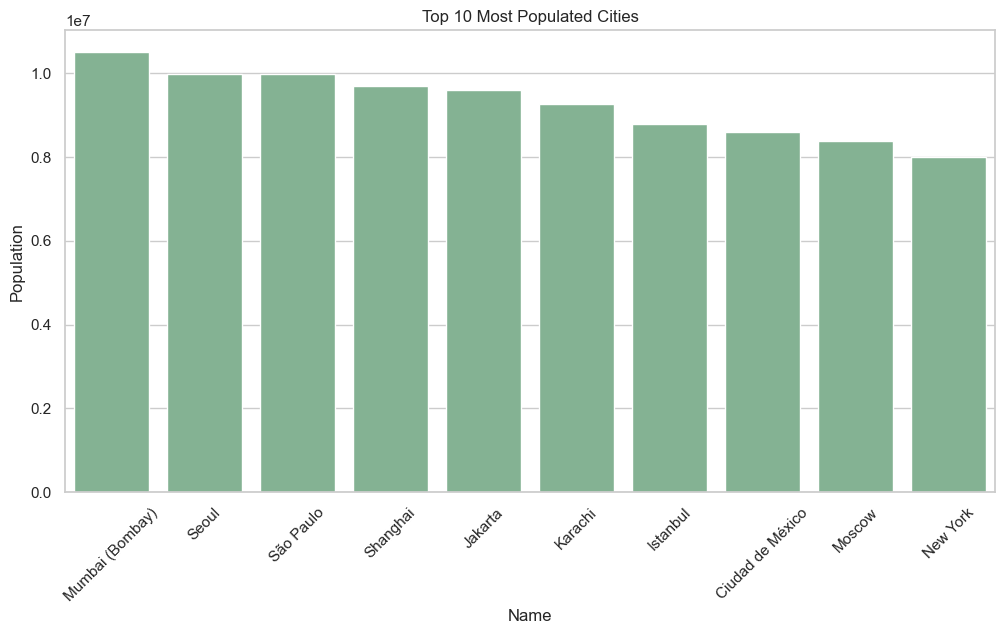

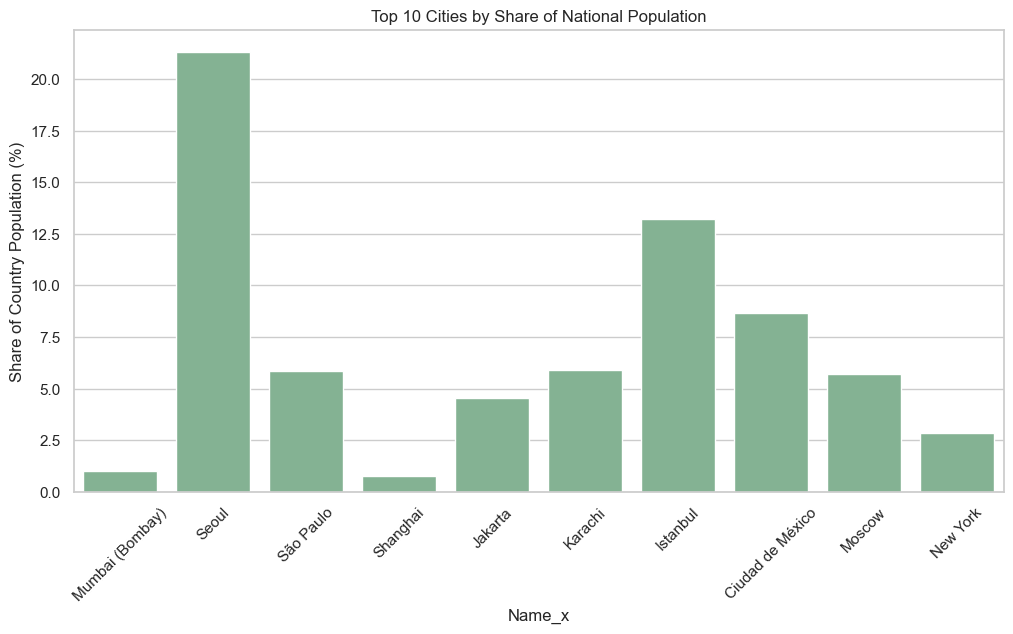

In [ ]:
# ----------------------------
# C. City-Level Insights
# ----------------------------

# 9. Top 10 most populated cities
top_cities = city.sort_values("Population", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x="Name", y="Population", data=top_cities)
plt.title("Top 10 Most Populated Cities")
plt.xticks(rotation=45)
plt.show()
# Insight: Mega cities like Shanghai, Mumbai, and São Paulo dominate urban populations globally.


# 10. City population share within its country 
top_cities_country = top_cities.merge(
    country[['Code','Name','Population']],
    left_on='CountryCode', right_on='Code'
)
top_cities_country['CityShare'] = top_cities_country['Population_x'] / top_cities_country['Population_y'] * 100

plt.figure(figsize=(12,6))
sns.barplot(x="Name_x", y="CityShare", data=top_cities_country)
plt.title("Top 10 Cities by Share of National Population")
plt.ylabel("Share of Country Population (%)")
plt.xticks(rotation=45)
plt.show()
# Insight: Some cities like Seoul or Istanbul represent a very large share of their national population, while others like New York or Tokyo are smaller relative to their countries.



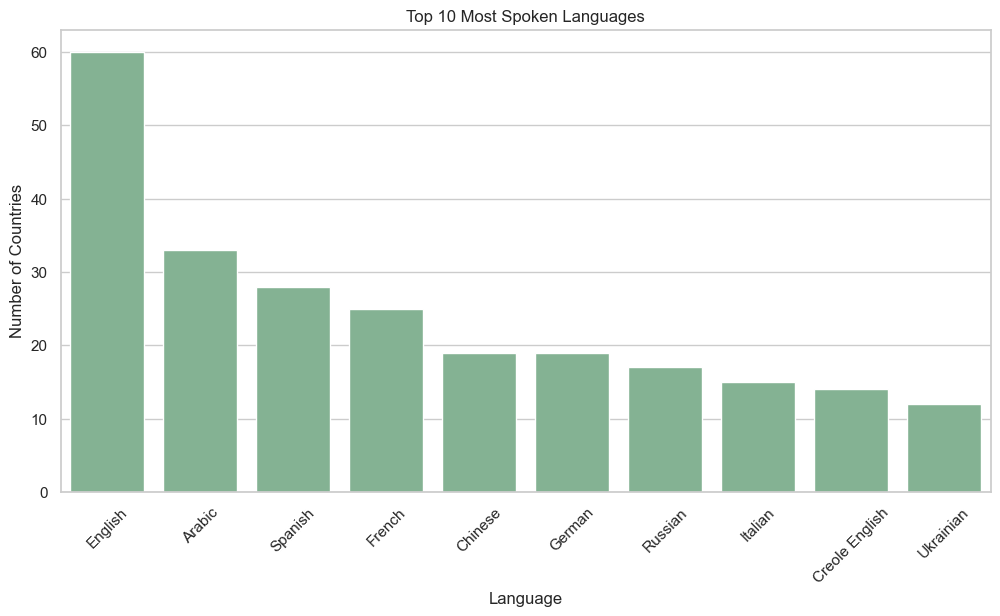

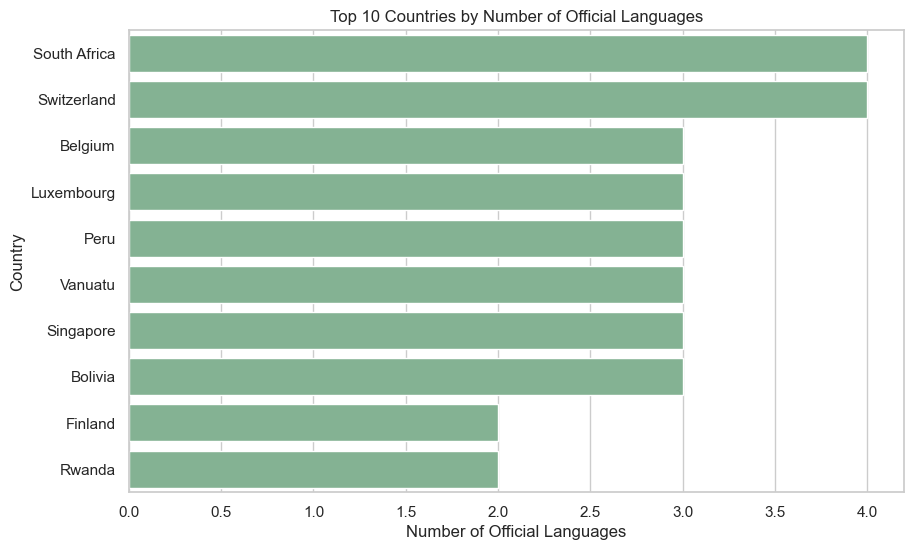

In [ ]:
# ----------------------------
# D. Language & Culture
# ----------------------------

# 11. Top 10 most spoken languages
top_languages = language['Language'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title("Top 10 Most Spoken Languages")
plt.xlabel("Language")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45)
plt.show()
# Insight: English, Arabic and Spanish are the most widespread across countries.


# 12. Number of official languages per country
official_langs = language[language["IsOfficial"]=="T"].groupby("CountryCode")["Language"].count().reset_index()
official_langs = official_langs.merge(country[["Code","Name"]], left_on="CountryCode", right_on="Code", how="left")

plt.figure(figsize=(10,6))
sns.barplot(
    x="Language", 
    y="Name", 
    data=official_langs.sort_values("Language", ascending=False).head(10)
)
plt.title("Top 10 Countries by Number of Official Languages")
plt.xlabel("Number of Official Languages")
plt.ylabel("Country")
plt.show()
# Insight: Countries like Switzerland and South Africa recognize multiple official languages, showcasing cultural and ethnic diversity.



# Final Summary & Key Takeaways

## Global Demographics
- Asia is home to the majority of the world’s population, while Africa is politically diverse with the largest number of countries.  
- Life expectancy varies significantly: Europe and Oceania lead, while Africa has the lowest median values.  

## Economic Landscape
- Global GNP is concentrated in **Asia and North America**, despite Africa’s large population.  
- Smaller high-income countries (e.g., **Luxembourg, Switzerland**) dominate per-capita wealth, showing that wealth is not tied to population size.  

## Population Distribution
- **China and India** together account for over a third of global population.  
- Tiny countries like **Macao and Monaco** have extreme population densities compared to much larger nations.  

## Urbanization Trends
- Mega-cities such as **Shanghai, Mumbai, and São Paulo** lead in city population.  
- Cities like **Seoul or Istanbul** contribute a disproportionately high share to their national populations.  

## Linguistic & Cultural Diversity
- **English, Arabic and Spanish** are the most globally widespread languages.  
- Countries such as **South Africa and Switzerland** recognize multiple official languages, reflecting cultural pluralism.  
